# 1. Preparar la información, importando y descargando las librerías necesarias

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
from math import factorial
import plotly as plt
import matplotlib.pyplot as mplt
import seaborn as sns
from scipy.stats import ttest_ind

# 2. Limpiar la información y preparar el DataFrame para ser usado a lo largo del ejercicio

In [5]:
df = pd.read_csv('./games.csv')
df.columns = df.columns.str.lower()
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce') #Cambiar el tipo de datos de "String u Objeto" a tipo "Float" ya que las caslificaciones tiene valores decimales. De esta manera podemos usar los datos de manera más sencilla.
df['year_of_release'] = df['year_of_release'].fillna(0) #Eliminar los datos nulos de los años para poderlos convertir a tipo de dato de entero, usamos 0 para poder continuar sin dar error ya que no sabemos el año en que se lanzaron esos juegos.
df['year_of_release'] = df['year_of_release'].astype('int') #Cambiamos el año de "Float" a "Interger", el año es un dato entero es más sencillo trabajar con este si tenemos los datos como entero.
df['name'] = df['name'].fillna('Unkown') #Reemplazar datos nulos de la columna "name"
df['genre'] = df['genre'].fillna('Unkown') #Reemplazar datos nulos de la columna "genre"
df['critic_score'] = df['critic_score'].fillna('') #Reemplazar datos nulos por ceros o info vacía para que no afecte los calculos a futuro
df['user_score'] = df['user_score'].fillna('') #Reemplazar datos nulos por ceros o info vacía para que no afecte los calculos a futuro
df['rating'] = df['rating'].fillna('TBD') #Reemplazar rating a nulo por "TBD" ya que no se a determinado el rating
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] #Crear una nueva columna con la suma total de las ventas por región de cada videojuego
print(df.head(5))
print(df.info())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales critic_score user_score rating  total_sales  
0     28.96      3.77         8.45         76.0        8.0      E        82.54  
1      3.58      6.81         0.77                            TBD        40.24  
2     12.76      3.79         3.29         82.0        8.3      E        35.52  
3     10.93      3.28         2.95         80.0        8.0      E        32.77  
4      8.89     10.22         1.00                            TBD        31.38  
<class 'pandas.core.frame.D

# 3. Analizar lod datos

## 3.1 Analisis de las ventas totales por año

<AxesSubplot:xlabel='year_of_release'>

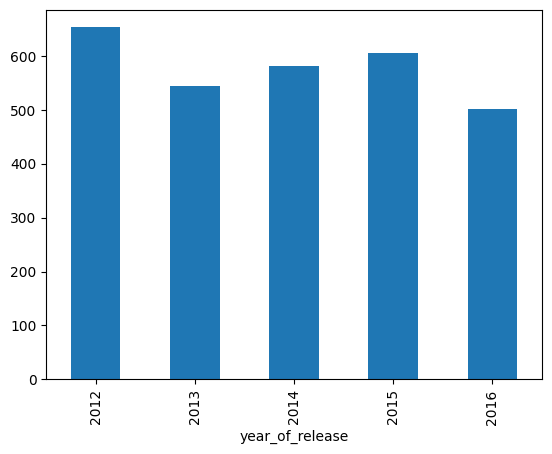

In [6]:
YTD = [2012,2013,2014,2015,2016]
games = df[df['year_of_release'].isin(YTD)][['year_of_release','name']]
games_per_year = games.groupby(['year_of_release'])['name'].count()
games_per_year.plot.bar()

#Podemos observar que a lo largo de los años se fue incrementando la cantidad de juegos que se lanzan por año, teniendo un pico en 2008 y 2009

## 3.2 Escoger el TOP 5 de las plataformas con más ventas

<AxesSubplot:xlabel='platform'>

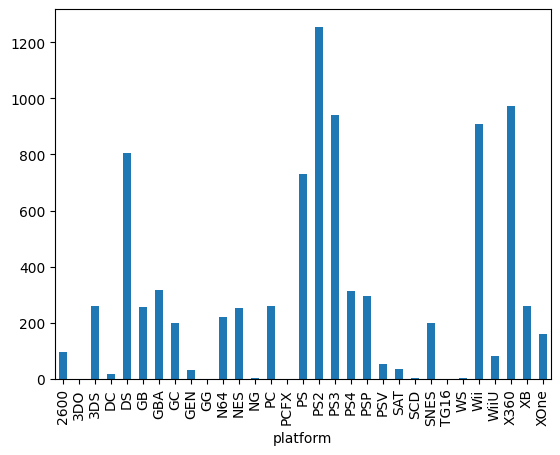

In [7]:
sales_per_platform = df.groupby(['platform'])['total_sales'].sum() #Agrupamos por plataforma sumamos las ventas totales por plataforma.
sales_per_platform.plot.bar() #Este gráfico representa las ventas totales por plataforma.

#De aqui tomarémos el TOP 5 de plataformas para analizar sus ventas por año, las cuales son: PS3, PS4, X360, Wii & DS

### 3.2.1 Ventas totales del TOP 5 desde su lanzamiento hasta la actualidad

(2003.0, 2017.0)

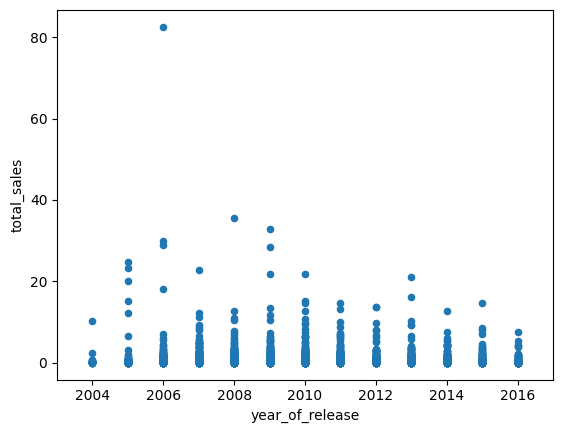

In [8]:
top5_platforms = ['PS3','PS4','X360','Wii','DS']
sales_top5_platforms = df[df['platform'].isin(top5_platforms)][['platform', 'year_of_release', 'total_sales']]
sales_top5_platforms.plot.scatter(x='year_of_release',y='total_sales')
mplt.xlim(2003,2017)

#Creamos un gráfico a partir de las 5 plataformas con más ventas, ordenamos las ventas por año y podemos ver que en 2006 fue un punto crítico para las plataformas

### 3.2.2 Cíclo de vida de las plataformas

In [9]:
pd.set_option('display.max_columns', None)
piv_sales_plat_year = df.pivot_table(index='platform',
                                     columns='year_of_release',
                                     values='total_sales',
                                     aggfunc='sum',
                                     fill_value=''
                                    )
display(piv_sales_plat_year)

#Con esta tabla dinámica podemos ver la popularidad y ventas de las plataformas a lo largo de los años
#Por lo general las consolas tienen 10 años de vida ante sde ser reeemplazadas por un nuevo modelo

year_of_release,0,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2600,10.5,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,,,,,,,,,,,,,,,,,,,,,,,,,,,
3DO,,,,,,,,,,,,,,,,0.02,0.08,,,,,,,,,,,,,,,,,,,,,
3DS,1.19,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,63.2,51.36,56.57,43.76,27.78,15.14
DC,,,,,,,,,,,,,,,,,,,,3.38,5.16,5.99,1.07,0.29,,,,,0.02,0.04,,,,,,,,
DS,3.34,,,,,,0.02,,,,,,,,,,,,,,,,,,,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,,,
GB,1.03,,,,,,,,,1.43,64.97,4.89,5.57,25.49,,12.18,3.6,36.03,6.37,26.9,38.0,19.76,9.24,,,,,,,,,,,,,,,
GBA,4.97,,,,,,,,,,,,,,,,,,,,,0.07,61.53,74.16,56.67,77.91,33.86,5.28,3.4,,,,,,,,,
GC,2.2,,,,,,,,,,,,,,,,,,,,,,26.34,51.81,50.61,28.82,27.62,11.26,0.27,,,,,,,,,
GEN,,,,,,,,,,,,2.6,4.33,12.64,3.07,8.13,,,,,,,,,,,,,,,,,,,,,,


## 3.3 Comportamiento de Ventas de las PLataformas en los últimos 5 años

In [10]:
years_for_2017 = [2012,2013,2014,2015,2016]
year_2017 = df[df['year_of_release'].isin(years_for_2017)]
year_2017['year_of_release'].unique()
year_2017_data = year_2017.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()
year_2017_data = year_2017_data.sort_values(by=['year_of_release','total_sales'], ascending=False)
display(year_2017_data)

#Con la información de los últimos 5 años podemos ver como va la tendencia de las plataformas más populares
#Podemos observar que las plataformas de Playstation PS3 y PS4 han sido líderes de mercado en los últimos 5 años.
#Seguido de Playstation, las plataformas de Xbox están en segundo lugar de la contienda.
#En tercer lugar se defienden los "handehelds" de Nintendo (3DS), que de vez en cuando aparecen en tercer lugar de más vendidos.

,year_of_release,platform,total_sales
43,2016,PS4,69.25
48,2016,XOne,26.15
40,2016,3DS,15.14
41,2016,PC,5.25
46,2016,WiiU,4.60
44,2016,PSV,4.25
42,2016,PS3,3.60
47,2016,X360,1.52
45,2016,Wii,0.18
33,2015,PS4,118.90


### 3.3.1 Las plataformas más rentables los últimos 5 años y a cuales debemos enfocar esfuerzos comerciables de rentabilidad.

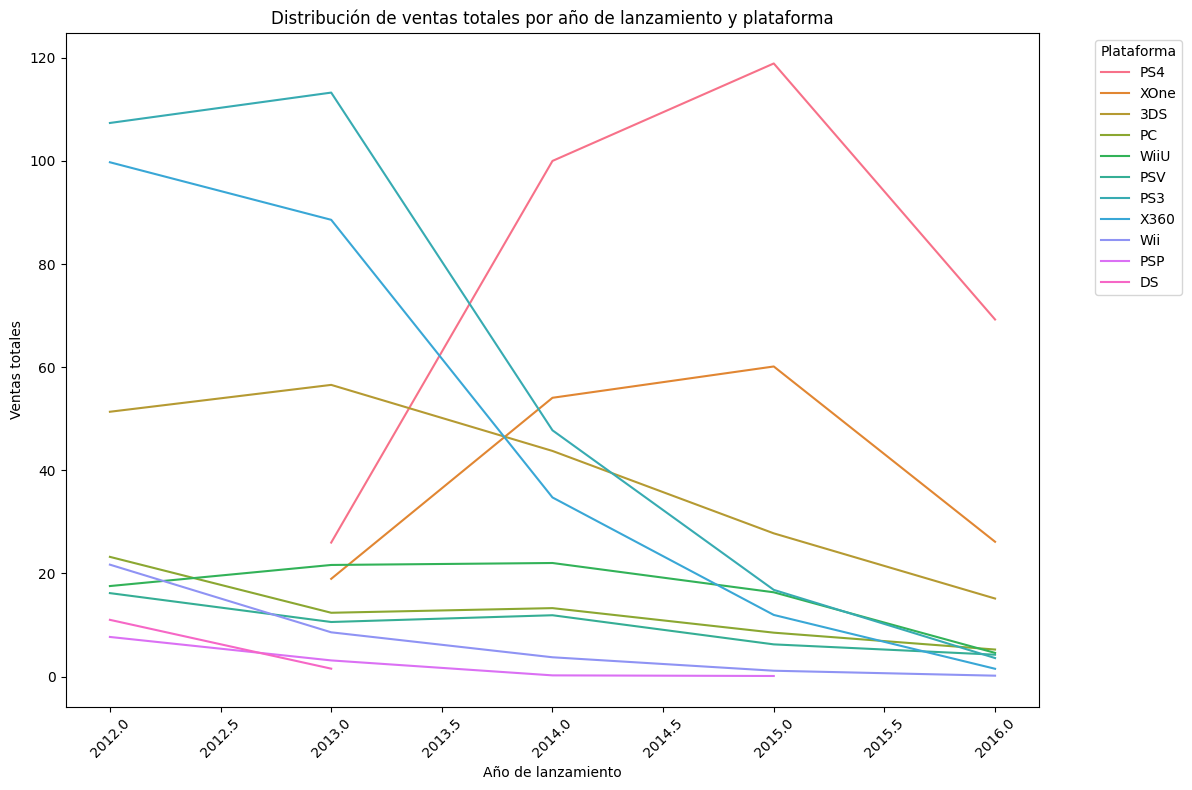

In [11]:
year_2017_data_DF = pd.DataFrame(year_2017_data, columns=['year_of_release','platform','total_sales'])

mplt.figure(figsize=(12,8))
sns.lineplot(data=year_2017_data_DF, x='year_of_release', y='total_sales', hue='platform')
mplt.title('Distribución de ventas totales por año de lanzamiento y plataforma')
mplt.xlabel('Año de lanzamiento')
mplt.ylabel('Ventas totales')
mplt.xticks(rotation=45)
mplt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
mplt.tight_layout()
mplt.show()

#En este caso la venta por plataformas van a la baja, están en punto crítico de cambiar de generación.
#En este caso las 3 plataformas que siguen siendo líderes y se podría considerar como las 3 más rentables son: PS4, XOne y 3DS.

## 3.4 Comportamiento en ventas por plataforma de los últimos 5 años (Boxplot)

Text(0, 0.5, 'Plataforma')

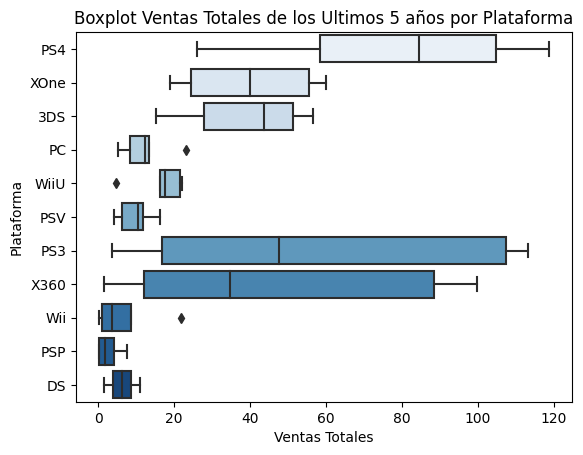

In [12]:
sns.boxplot(data=year_2017_data, x='total_sales', y='platform', palette='Blues')
mplt.title('Boxplot Ventas Totales de los Ultimos 5 años por Plataforma')
mplt.xlabel('Ventas Totales')
mplt.ylabel('Plataforma')

#Tomamos la información relevante de los últimos 5 años para ver el comportamiento más reciente de las plataformas activas.
#Esto nos muestra que las plataformas más relevantes en los últimos 5 años son: PS4, XOne, PS3, 3DS y X360

## 3.5 Comportamiento de ventas de videojuegos del PS4 en función a las calificaciones de expertos y usuarios

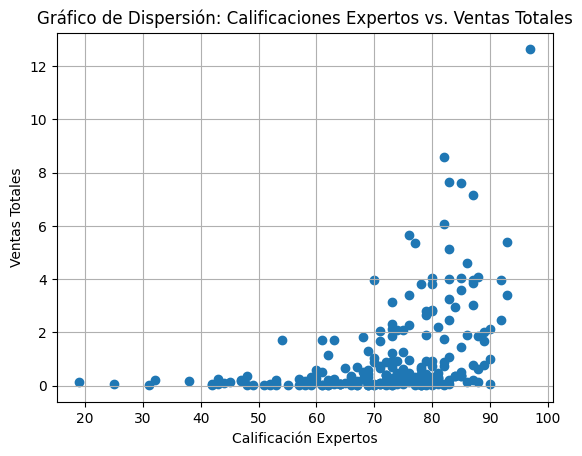

La correlación entre la calificación de los expertos y las ventas totales es de: 0.42302327483238306


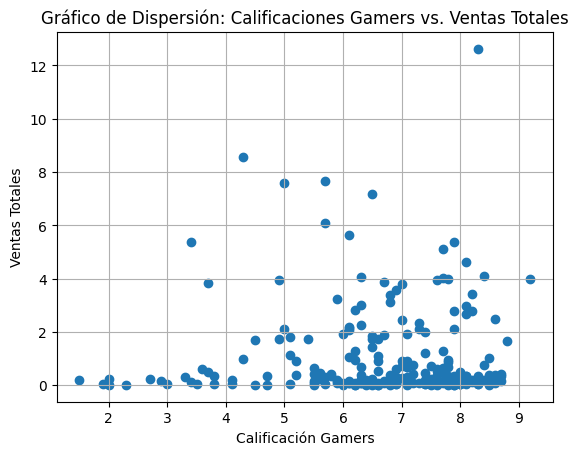

La correlación entre la calificación de los usuarios y las ventas totales es de: -0.017336572457953964


In [13]:
plat_list = ['PS4']
plat_data = df[df['platform'].isin(plat_list)]
critics_and_scores = plat_data.groupby(['critic_score', 'user_score', 'platform'])['total_sales'].sum().reset_index()
critics_and_scores = pd.DataFrame(critics_and_scores, columns=['critic_score', 'user_score', 'platform','total_sales'])
critics_and_scores['user_score'] = pd.to_numeric(critics_and_scores['user_score'], errors='coerce')
critics_and_scores['critic_score'] = pd.to_numeric(critics_and_scores['critic_score'], errors='coerce')
mplt.scatter(critics_and_scores['critic_score'], critics_and_scores['total_sales'])
mplt.xlabel('Calificación Expertos')
mplt.ylabel('Ventas Totales')
mplt.title('Gráfico de Dispersión: Calificaciones Expertos vs. Ventas Totales')
mplt.grid(True)
mplt.show()
correlacion_critics = critics_and_scores['critic_score'].corr(critics_and_scores['total_sales'])
print("La correlación entre la calificación de los expertos y las ventas totales es de:", correlacion_critics)
mplt.scatter(critics_and_scores['user_score'], critics_and_scores['total_sales'])
mplt.xlabel('Calificación Gamers')
mplt.ylabel('Ventas Totales')
mplt.title('Gráfico de Dispersión: Calificaciones Gamers vs. Ventas Totales')
mplt.grid(True)
mplt.show()
correlacion_users = critics_and_scores['user_score'].corr(critics_and_scores['total_sales'])
print("La correlación entre la calificación de los usuarios y las ventas totales es de:", correlacion_users)

#En este caso afectan más las calificaciones dadas por los expertos que por los usuarios.
#Mientras mayor sea la calificaciones de los expertos hay más ventas, este patrón no es tan visible para la calificación de los gamers.

## 3.6 Comportamiento de ventas de acuerdo al mismo juego en distintas plataformas del Playstation, considerando sólo las ventas del 2014.

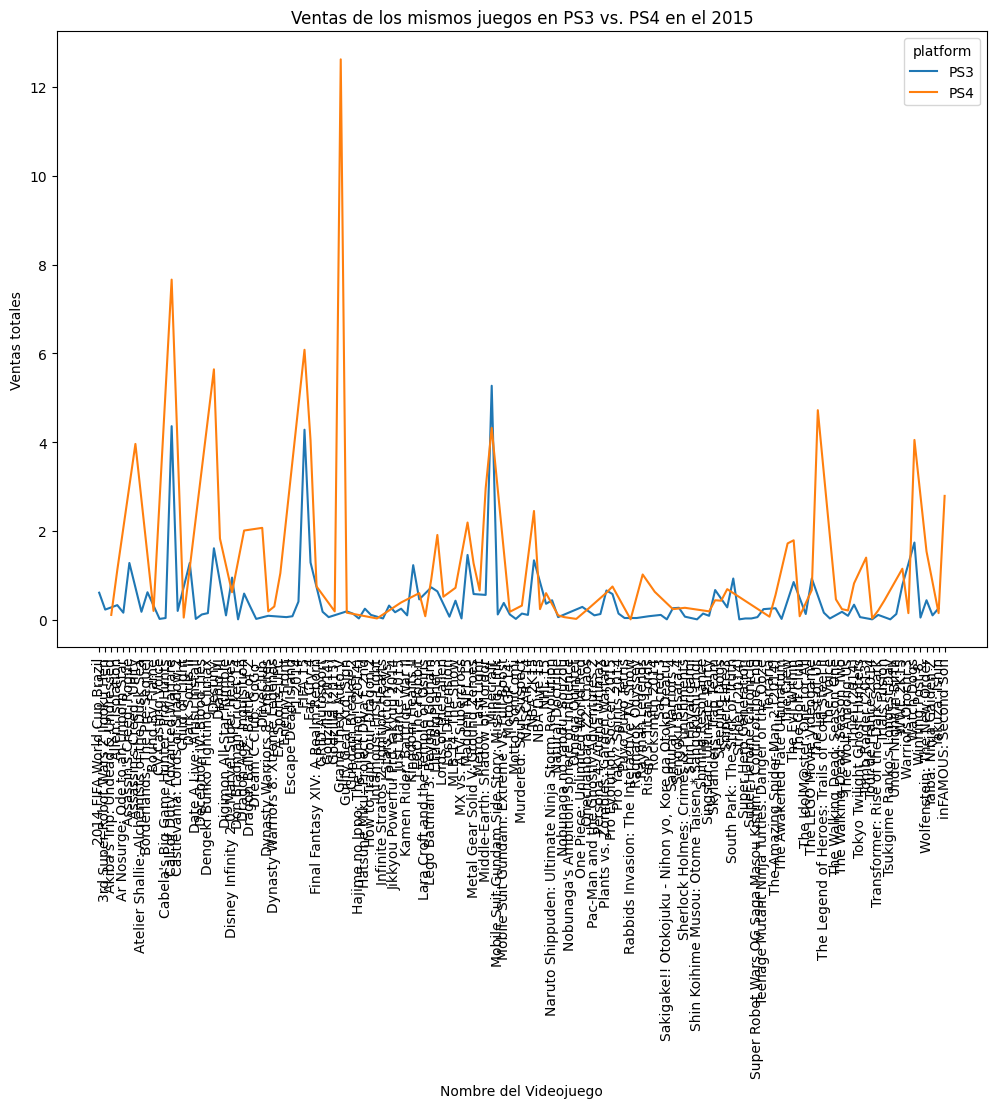

In [14]:
games_name = df.groupby(['year_of_release', 'name', 'platform'])['total_sales'].sum().reset_index()
PS_list = ['PS3','PS4']
PS_years_list = [2014]
PS_platforms = games_name[games_name['platform'].isin(PS_list) & games_name['year_of_release'].isin(PS_years_list)]
PS_platforms = pd.DataFrame(PS_platforms, columns=['year_of_release','name','platform','total_sales'])

mplt.figure(figsize=(12,8))
sns.lineplot(data=PS_platforms, x='name', y='total_sales', hue='platform')
mplt.title('Ventas de los mismos juegos en PS3 vs. PS4 en el 2015')
mplt.xlabel('Nombre del Videojuego')
mplt.ylabel('Ventas totales')
mplt.xticks(rotation=90)
mplt.show()

#El PS4 fue lanzado en Noviembre del 2013, en 2014 al ser una consola nueva superó la venta de juegos de la plataforma anterior PS3.
#Esto nos dá a entender dos cosas: 
#1. PS4 fue una consola con más ventas de videojuegos, después de su primer año de lanzamiento. Comparando con PS3.
#2. Más gente compó la nueva consola (PS4) y disfrutó de títulos accesibles a ambas consolas, incluso cuando PS3 más tiempo en mercado y posiblemente era más económica.

## 3.7 Ventas totales de videojuegos por género.

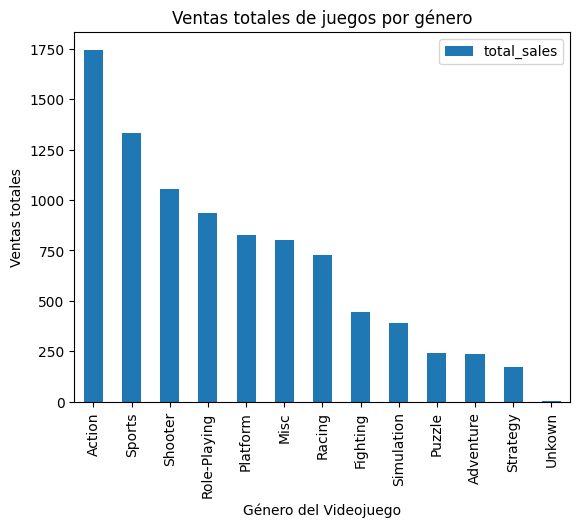

In [15]:
data_per_genre = df.groupby(['genre'])['total_sales'].sum().reset_index()
data_per_genre = data_per_genre.sort_values(by='total_sales', ascending=False)
data_per_genre = pd.DataFrame(data_per_genre, columns=['genre','total_sales'])
data_per_genre.plot(x='genre', y='total_sales', kind='bar')
mplt.title('Ventas totales de juegos por género')
mplt.xlabel('Género del Videojuego')
mplt.ylabel('Ventas totales')
mplt.xticks(rotation=90)
mplt.show()

#Tomando el total de ventas de nuestro historial completo, podemos llegar a la conclusión que el género del videojuego afecta las ventas.
#Los 5 géneros más rentables a lo largo de la historia son: Action, Sports, Shooter, Role-Playing y Platform

# 4. Creación de perfil de usuario por región (NA, EU, JP)

## 4.1 Creación de perfil de ventas del TOP 5 plataformas por región

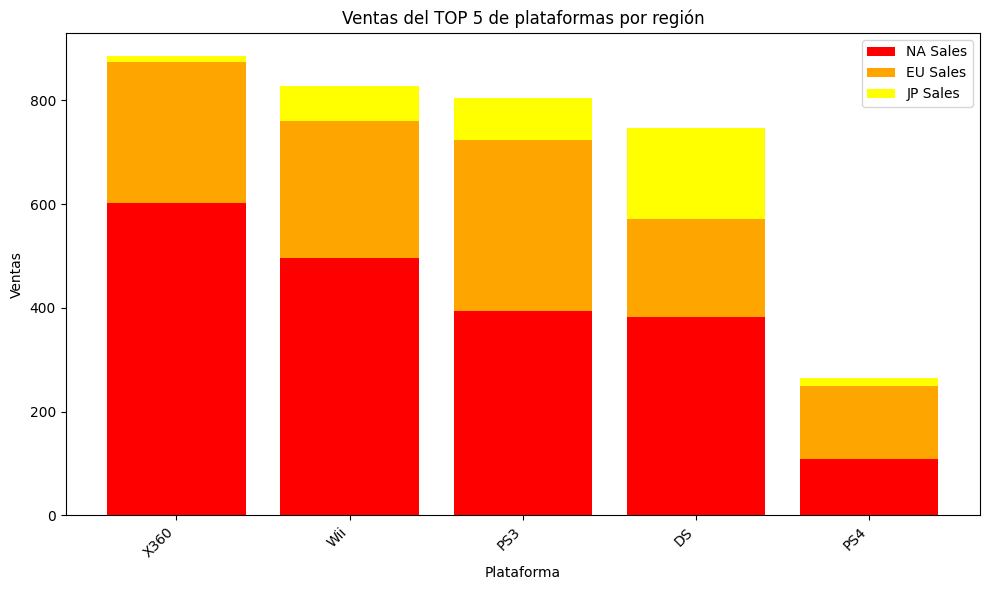

In [16]:
sales_per_region = df.groupby('platform').agg({
    'na_sales':'sum',
    'jp_sales':'sum',
    'eu_sales':'sum'
}).reset_index()

top5_platforms = ['PS3','PS4','X360','Wii','DS']
sales_per_region = sales_per_region[sales_per_region['platform'].isin(top5_platforms)][['platform', 'na_sales', 'eu_sales', 'jp_sales']]
sales_per_region = sales_per_region.sort_values(by=['na_sales', 'eu_sales', 'jp_sales'], ascending=False)

mplt.figure(figsize=(10, 6))
mplt.bar(sales_per_region['platform'], sales_per_region['na_sales'], color='red', label='NA Sales')
mplt.bar(sales_per_region['platform'], sales_per_region['eu_sales'], color='orange', label='EU Sales', bottom=sales_per_region['na_sales'])
mplt.bar(sales_per_region['platform'], sales_per_region['jp_sales'], color='yellow', label='JP Sales', bottom=sales_per_region['na_sales']+sales_per_region['eu_sales'])
mplt.xlabel('Plataforma')
mplt.ylabel('Ventas')
mplt.title('Ventas del TOP 5 de plataformas por región')
mplt.legend()
mplt.xticks(rotation=45, ha='right')  
mplt.tight_layout()  
mplt.show()

#En general las región con más ventas es America del Norte, seguida por el área Económica Europea
#Sólo en el caso del DS las ventas en Europa y Japón se azemejan.

## 4.2 Creación de perfil de ventas de videojuegos usando el TOP 5 de géneros por región

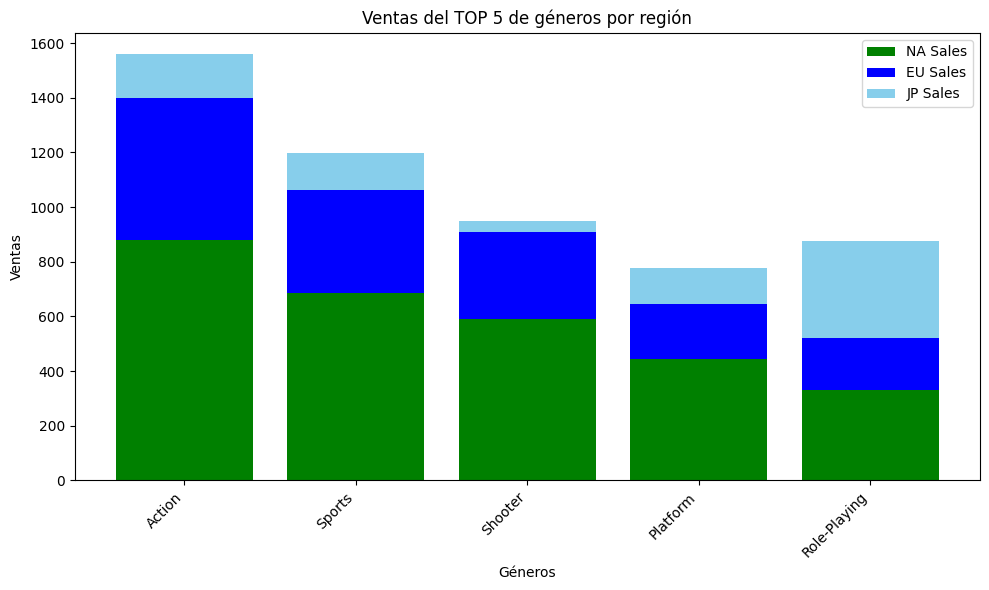

In [17]:
sales_per_region_g = df.groupby('genre').agg({
    'na_sales':'sum',
    'jp_sales':'sum',
    'eu_sales':'sum'
}).reset_index()

top5_genres = ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform']
sales_per_region_g = sales_per_region_g[sales_per_region_g['genre'].isin(top5_genres)][['genre', 'na_sales', 'eu_sales', 'jp_sales']]
sales_per_region_g = sales_per_region_g.sort_values(by=['na_sales', 'eu_sales', 'jp_sales'], ascending=False)

mplt.figure(figsize=(10, 6))
mplt.bar(sales_per_region_g['genre'], sales_per_region_g['na_sales'], color='green', label='NA Sales')
mplt.bar(sales_per_region_g['genre'], sales_per_region_g['eu_sales'], color='blue', label='EU Sales', bottom=sales_per_region_g['na_sales'])
mplt.bar(sales_per_region_g['genre'], sales_per_region_g['jp_sales'], color='skyblue', label='JP Sales', bottom=sales_per_region_g['na_sales']+sales_per_region_g['eu_sales'])
mplt.xlabel('Géneros')
mplt.ylabel('Ventas')
mplt.title('Ventas del TOP 5 de géneros por región')
mplt.legend()
mplt.xticks(rotation=45, ha='right')  
mplt.tight_layout()  
mplt.show()

#La distribución en ventas por género es bastante parecida a lo largo de las distintas regiones.
#Sólo en Japón vemos una preferencia por los juegos de rol, este géero tiene mayor impacto ahí.

## 4.3 Creación de perfil de ventas de videojuegos por 'Rating' o Clasificación

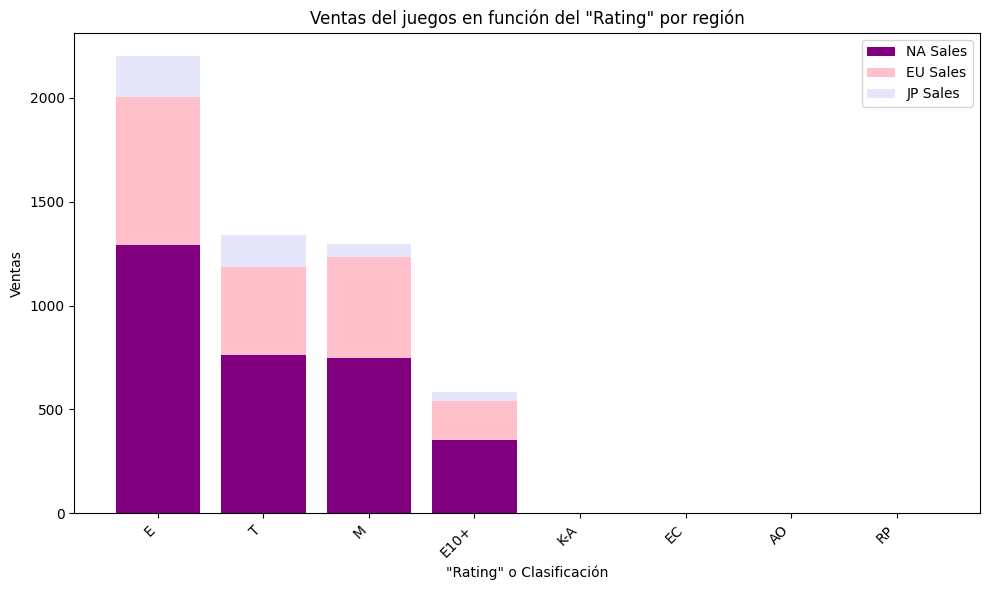

In [18]:
sales_per_region_r = df.groupby('rating').agg({
    'na_sales':'sum',
    'jp_sales':'sum',
    'eu_sales':'sum'
}).reset_index()

ratings_list = ['E', 'T', 'M', 'E10+', 'K-A', 'EC', 'AO', 'RP']
sales_per_region_r = sales_per_region_r[sales_per_region_r['rating'].isin(ratings_list)][['rating', 'na_sales', 'eu_sales', 'jp_sales']]
#La falta de clasificaciónes hacen que sea más complicado realizar la grafica
#Por eso decidimos dejar afuera los juegos que aún no han sido clasificados para poder realizar el ejercicio con información más certera.

sales_per_region_r = sales_per_region_r.sort_values(by=['na_sales', 'eu_sales', 'jp_sales'], ascending=False)

mplt.figure(figsize=(10, 6))
mplt.bar(sales_per_region_r['rating'], sales_per_region_r['na_sales'], color='purple', label='NA Sales')
mplt.bar(sales_per_region_r['rating'], sales_per_region_r['eu_sales'], color='pink', label='EU Sales', bottom=sales_per_region_r['na_sales'])
mplt.bar(sales_per_region_r['rating'], sales_per_region_r['jp_sales'], color='lavender', label='JP Sales', bottom=sales_per_region_r['na_sales']+sales_per_region_r['eu_sales'])
mplt.xlabel('"Rating" o Clasificación')
mplt.ylabel('Ventas')
mplt.title('Ventas del juegos en función del "Rating" por región')
mplt.legend()
mplt.xticks(rotation=45, ha='right')  
mplt.tight_layout()  
mplt.show()

#En este caso no existe gran diferenciador entre las clasificaciones de ls videojuegoes en función a la región.
#Las ventas por clasificación se comportan similar en todas las regiones.

# 5. Pruebas de hipótesis

## 5.1 Hipótesis 1: Calificaciones de los mismo videojuegos en Xbox vs. PC

* Hipótesis Nula: Las calificaciones promedio entre Xbox One y PC son las mismas.
* Hipótesis Alternativa : Las calificaciones promedio entre Xbox One y PC son diferentes.

In [36]:
from scipy import stats as st

score_XOne = df[df['platform'] == 'XOne']['user_score']
score_PC = df[df['platform'] == 'PC']['user_score']

score_XOne = pd.to_numeric(score_XOne, errors='coerce').dropna()
score_PC = pd.to_numeric(score_PC, errors='coerce').dropna()

alpha = 0.05
results_p = st.ttest_ind(score_XOne, score_PC, equal_var=False)

print(f"""
     La calificacion promedio para Xbox One es: {score_XOne.mean()}
     La calificacion promedio para PC es: {score_PC.mean()}
""")

print('Valor P es igual a: ', results_p.pvalue)

if results_p.pvalue < alpha:
    print('Rechazamos nuestra hipótesis nula')
else:
    print('No rechazamos nuestra hipótesis nula')
    
sa = st.levene(score_XOne,score_PC)
print(sa)

 #En este caso los videojuegos están mucho mejor calificacods en la PC que en el Xbox One.
 #En este ejercicio rechazaría la hipótesis nula, ya que el pvalue está muy alejado de nuestro alpha.


     La calificacion promedio para Xbox One es: 6.521428571428572
     La calificacion promedio para PC es: 7.062467532467533

Valor P es igual a:  4.935072360183574e-06
Rechazamos nuestra hipótesis nula
LeveneResult(statistic=1.2212506384014863, pvalue=0.2693951512047048)


## 5.2 Hipótesis 2: Calificaciones de usuarios entre dos géneros distintos populares: Action y Sports

* Hipótesis Nula: Las calificaciones promedio entre Action y Sports son similares.
* Hipótesis Alternativa : Las calificaciones promedio entre Action y Sports son completamente diferentes.

In [37]:
score_Action = df[df['genre'] == 'Action']['user_score']
score_Sports = df[df['genre'] == 'Sports']['user_score']

score_Action = pd.to_numeric(score_Action, errors='coerce').dropna()
score_Sports = pd.to_numeric(score_Sports, errors='coerce').dropna()

alpha = 0.05
results_g = st.ttest_ind(score_Action, score_Sports, equal_var=False)

print(f"""
     La calificacion promedio para los juegos de Acción es: {score_Action.mean()}
     La calificacion promedio para los juegos de Deportes es: {score_Sports.mean()}
""")

print('Valor P es igual a: ', results_g.pvalue)

if results_g.pvalue < alpha:
    print('Rechazamos nuestra hipótesis nula')
else:
    print('No rechazamos nuestra hipótesis nula')   

sb = st.levene(score_Action,score_Sports)
print(sb)

#En este caso no podemos rechazar la hipótesis nula.
#Nuestro P Value en este caso es mayor que el alpha, haciéndonos saber que hay una fuerte relación entre las calificaciones de los usuarios para estos dos géneros.


     La calificacion promedio para los juegos de Acción es: 7.054043715846995
     La calificacion promedio para los juegos de Deportes es: 6.961196736174069

Valor P es igual a:  0.11483818791498286
No rechazamos nuestra hipótesis nula
LeveneResult(statistic=14.132896085177192, pvalue=0.0001736640672727649)


# 6. Conclusiones generales del proyecto

* La ventas de videojuegos ha incrementado con el paso del tiempo, mientras más pasan los años más populares se vuelven.
* Las plataformas líderes en los mercados son las que corresponden a PlayStation.
* La única plataforma portátil con un desempeño alto en el mercado es el 3DS.
* El PS4 es la plataforma más rentable, incluso robándole mercado al PS3 desde su lanzamiento.
* La segunda plataforma más rentable es el Xbox One, manteniendo un segundo lugar con alto desempeño.
* Las críticas de los expertos tienen mayor peso para la compra de videojuegos, pueden llegar a afectar la venta de los videojuegos.
* Los géneros más vendidos son: Action, Sports, Shooter, Role-Playing y Platform.
* La venta de videojuegos por región es bastante similar, sólo en Japón destacan los juegos de Role-Playing.
* La plataforma DS tuve un éxito impactante en Japón.
* El 'Rating' o clasificación de los videojuegos no impacta sus ventas por región.
* Los juegos están mejor calificados por ls usuarios que los juegan en PC.
* Los géneros de acción y deportes tienen calificaciones muy similares.

En general este proyecto nos ha servido para poder comprender como se mueve el mercado de los videojuegos.
Al igual que un cubo de rubix podemos darle vuelta y cambiarle las caras dependiendo lo que queramos analizar del mercado.
Este proyecto me ha funcionado para mejorar las habilidades de visualización de datos y pruebas de hipótesis para las tomas de decisiones.